In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
# Loads dataset into pandas DataFrame


In [ ]:
df= pd.read_csv('/content/coin_BinanceCoin.csv')
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
1308,1309,Binance Coin,BNB,2021-02-23 23:59:59,268.536845,190.412463,267.364425,230.994252,8.280753e+09,3.569619e+10
1309,1310,Binance Coin,BNB,2021-02-24 23:59:59,280.088196,214.524714,231.121604,254.359132,7.154122e+09,3.930683e+10
1310,1311,Binance Coin,BNB,2021-02-25 23:59:59,264.705134,233.885956,254.467606,233.885956,4.059853e+09,3.614305e+10
1311,1312,Binance Coin,BNB,2021-02-26 23:59:59,238.755012,210.310761,235.270287,221.680429,4.167146e+09,3.425689e+10


In [ ]:
df = df.sort_values('Date')

In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [ ]:
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
1,2,Binance Coin,BNB,2017-07-27,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
2,3,Binance Coin,BNB,2017-07-28,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
3,4,Binance Coin,BNB,2017-07-29,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
4,5,Binance Coin,BNB,2017-07-30,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
1308,1309,Binance Coin,BNB,2021-02-23,268.536845,190.412463,267.364425,230.994252,8.280753e+09,3.569619e+10
1309,1310,Binance Coin,BNB,2021-02-24,280.088196,214.524714,231.121604,254.359132,7.154122e+09,3.930683e+10
1310,1311,Binance Coin,BNB,2021-02-25,264.705134,233.885956,254.467606,233.885956,4.059853e+09,3.614305e+10
1311,1312,Binance Coin,BNB,2021-02-26,238.755012,210.310761,235.270287,221.680429,4.167146e+09,3.425689e+10


In [ ]:
df.drop('Symbol',axis=1, inplace=True)

In [ ]:
df.drop('Name',axis=1, inplace=True)

In [ ]:
df.drop('SNo',axis=1, inplace=True)

In [ ]:
df

,Date,High,Low,Open,Close,Volume,Marketcap
0,2017-07-26,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
1,2017-07-27,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
2,2017-07-28,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
3,2017-07-29,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
4,2017-07-30,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...
1308,2021-02-23,268.536845,190.412463,267.364425,230.994252,8.280753e+09,3.569619e+10
1309,2021-02-24,280.088196,214.524714,231.121604,254.359132,7.154122e+09,3.930683e+10
1310,2021-02-25,264.705134,233.885956,254.467606,233.885956,4.059853e+09,3.614305e+10
1311,2021-02-26,238.755012,210.310761,235.270287,221.680429,4.167146e+09,3.425689e+10


**Volatility calculation**

In [ ]:
df['daily_ret'] = df['Close'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [ ]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [ ]:
df['volatility'] = df['volatility']*100

In [ ]:
df

,Date,High,Low,Open,Close,Volume,Marketcap,daily_ret,volatility
0,2017-07-26,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07,0.000000,0.000000
1,2017-07-27,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07,0.024720,0.000000
2,2017-07-28,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07,-0.034064,0.000000
3,2017-07-29,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07,0.035977,0.000000
4,2017-07-30,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07,-0.012958,0.000000
...,...,...,...,...,...,...,...,...,...
1308,2021-02-23,268.536845,190.412463,267.364425,230.994252,8.280753e+09,3.569619e+10,-0.136502,19.883061
1309,2021-02-24,280.088196,214.524714,231.121604,254.359132,7.154122e+09,3.930683e+10,0.101149,19.824400
1310,2021-02-25,264.705134,233.885956,254.467606,233.885956,4.059853e+09,3.614305e+10,-0.080489,20.184206
1311,2021-02-26,238.755012,210.310761,235.270287,221.680429,4.167146e+09,3.425689e+10,-0.052186,20.183895


In [ ]:
pf=df.reset_index()['volatility']

In [ ]:
import matplotlib.pyplot as plt 

**visualization**

No handles with labels found to put in legend.


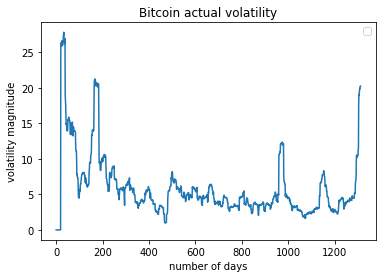

In [ ]:
plt.plot(pf)
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('Bitcoin actual volatility')
plt.legend(loc='best')
plt.show(block=False)


**visualization with date**

<Figure size 576x432 with 0 Axes>

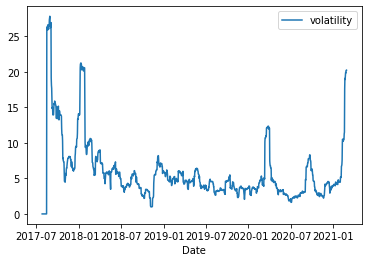

In [ ]:
plt.figure(figsize=(8,6))
df.plot(x='Date', y='volatility')
plt.show()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler(feature_range=(0,1))
#scaled_data = scaler.fit_transform(df['volatility'].values.reshape(-1,1))

In [ ]:
#features = ["Date", "High", "Low", "Open", "Close", "Volume", "Marketcap","daily_ret"]

In [ ]:
#X = df[features]


In [ ]:
#y = df['volatility']

In [ ]:
#from sklearn.model_selection import train_test_split
#train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(df['volatility'].values.reshape(-1,1)))

In [ ]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]



In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:

print(X_train.shape), print(y_train.shape)

(818, 100)
(818,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)



In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.optimizers import Adam

Initial approach

In [ ]:
#Those experiment has been done on bitcoin dataset
#model=Sequential()
#model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
#model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
#RMSE score : 3.51 with 50 neurons and 100 epochs

In [ ]:

#model=Sequential()
#model.add(LSTM(20,return_sequences=True,input_shape=(100,1)))
#model.add(LSTM(20))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')

# same rmse score : 3.51 with 20 neurons, one less layer and 10 epochs

In [ ]:

#model=Sequential()
#model.add(LSTM(10,return_sequences=True,input_shape=(100,1)))
#model.add(LSTM(10))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')

# mse score: 3.66 with 10 neurons and 10 epochs
# mse score: 3.59 with 10 neurons and 100 epochs
#mse score : 3.35 with 100 neurons and 10 epochs

In [ ]:

#model=Sequential()
#model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
#model.add(LSTM(100,return_sequences=True))
#model.add(LSTM(100,return_sequences=True))
#model.add(LSTM(100,return_sequences=True))
#model.add(LSTM(100))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
#this gave rmse 3.61

In [ ]:
#optimizers are :Stochastic Gradient Descent (SGD), Adaptive Gradient (Adagrad), Adaptive Delta (Adadelta), Root Mean Square Propagation (RMSProp), Adaptive Momentum (Adam), Adaptive Max Pooling (Adamax), and Nesterov Adaptive Momentum (Nadam)

In [ ]:

#model=Sequential()
#model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
#model.add(LSTM(100))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='SGD')

#this is with Adam rmse score: 3.35
#this is with sgd rmse score :3.43
# this is with adadelta rmse score :0.73(taken)
# this is with RMSProp rmse score 3.68
#this is with Adamax rmse score 3.79
#this is with nadam rmse score 3.40

# adding softmax in the output layer give rmse 6.02 
#addinhg relu in the output layer give rmse 1.02 
# this is with mae loss and adadelta optimizer rmse 0.72
# this is with mape loss and adadelta optimizer rmse 2.69
#this is with mean_squared_logarithmic_error function loss and adadelta optimizer rmse 1.42
#this is with cosine_similarity  loss and adadelta optimizer rmse 0.76
#this is with huber loss loss and adadelta optimizer rmse 0.38,0.71
#this is with log_cosh loss and adadelta optimizer rmse 0.27


MeanSquaredError class,
MeanAbsoluteError class,
MeanAbsolutePercentageError class,
MeanSquaredLogarithmicError class,
CosineSimilarity class,
mean_squared_error function,
mean_absolute_error function,
mean_absolute_percentage_error function,
mean_squared_logarithmic_error function,
cosine_similarity function,
Huber class,
huber function,
LogCosh class,
log_cosh function,

In [ ]:
#mean_absolute_error,"mean_absolute_percentage_error",cosine_similarity,huber_loss,log_cosh

In [ ]:

model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')


In [ ]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
55/55 [==============================] - 13s 168ms/step - loss: 8.8985e-04 - val_loss: 0.0066
Epoch 2/10
55/55 [==============================] - 8s 154ms/step - loss: 3.1605e-04 - val_loss: 0.0057
Epoch 3/10
55/55 [==============================] - 8s 153ms/step - loss: 2.6805e-04 - val_loss: 0.0051
Epoch 4/10
55/55 [==============================] - 8s 154ms/step - loss: 2.3655e-04 - val_loss: 0.0048
Epoch 5/10
55/55 [==============================] - 9s 155ms/step - loss: 2.0388e-04 - val_loss: 0.0045
Epoch 6/10
55/55 [==============================] - 8s 152ms/step - loss: 1.7659e-04 - val_loss: 0.0042
Epoch 7/10
55/55 [==============================] - 8s 153ms/step - loss: 1.6139e-04 - val_loss: 0.0038
Epoch 8/10
55/55 [==============================] - 8s 152ms/step - loss: 1.4758e-04 - val_loss: 0.0037
Epoch 9/10
55/55 [==============================] - 8s 153ms/step - loss: 1.3136e-04 - val_loss: 0.0033
Epoch 10/10
55/55 [==============================] - 8s 152ms/s

In [ ]:
import tensorflow as tf
from sklearn.metrics import r2_score

In [ ]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict.shape

(1740, 1)

In [ ]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
#X = np.reshape(ytest,(1, ytest.size))
#Y_test =scaler.inverse_transform(X)

In [ ]:
#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(ytest,test_predict))
RMSE

12.867400878525899

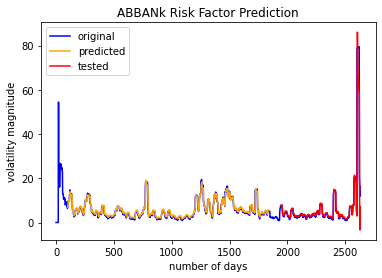

In [ ]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(dff)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dff)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dff)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dff),color ='blue', label ='original')
plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')

#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ABBANk Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [ ]:

x_input=test_data[690:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.11517221]
101
1 day input [0.05329928 0.05623439 0.05943768 0.06959232 0.07927214 0.08896212
 0.08813974 0.08758625 0.08758637 0.08728117 0.08963037 0.08961432
 0.08958843 0.09063161 0.09044152 0.09047932 0.09036765 0.09172076
 0.09169039 0.09190466 0.09179856 0.077938   0.0771684  0.07215744
 0.05633291 0.05205957 0.04487003 0.04549021 0.04469588 0.06471127
 0.06482225 0.06459489 0.08131861 0.09905109 0.09791024 0.09838891
 0.09825101 0.09788616 0.096742   0.09651548 0.09595501 0.10887216
 0.25342247 0.25664717 0.25648366 0.25601514 0.25604426 0.25869414
 0.25897025 0.25878847 0.2577162  0.26119035 0.26220814 0.25536685
 0.25151124 0.25159412 0.25143234 0.25197914 0.25195824 0.25166414
 0.25204006 0.25500216 0.25006163 0.06835079 0.06551683 0.06621691
 0.06596345 0.06745233 0.98133639 0.98224261 0.9944769  0.99392073
 0.99307365 0.99326049 0.99280139 0.99489516 0.9972352  0.99558602
 0.99444466 0.99463084 0.99689119 0.9961951  0.9949453  0.99552999
 0.99662963 0.99803695 0.99925518

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

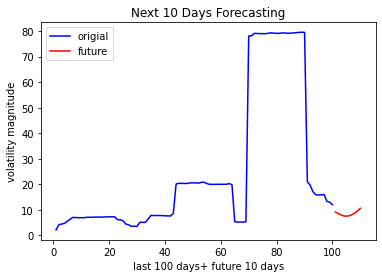

In [ ]:

plt.plot(day_new,scaler.inverse_transform(dff[2531:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 10 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Forecasting')
plt.legend(loc='best')
plt.show(block=False)

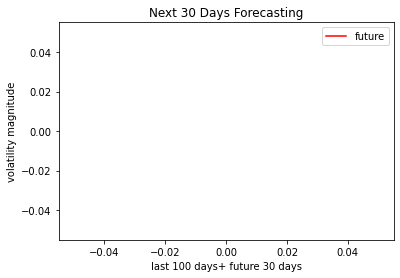

In [ ]:



df3=dff.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[2832:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

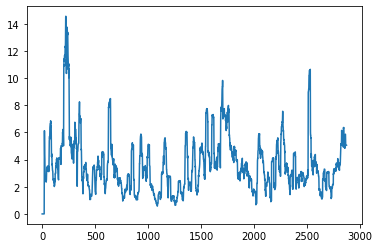

In [ ]:
plt.plot(df3)